订单: 
	订单编号: 2020-NM-1
	轧制序号: 2020-OPTIM-1-1
	工艺流程: BP2

订单: 
	订单编号: 2020-NM-1
	轧制序号: 2020-OPTIM-1-2
	工艺流程: BP2

订单: 
	订单编号: 2020-NM-2
	轧制序号: 2020-OPTIM-2-1
	工艺流程: BP2

订单: 
	订单编号: 2020-NM-3
	轧制序号: 2020-OPTIM-3-1
	工艺流程: BP2,WC

订单: 
	订单编号: 2020-NM-4
	轧制序号: 2020-OPTIM-4-1
	工艺流程: BP2,TS

订单: 
	订单编号: 2020-NM-5
	轧制序号: 2020-OPTIM-5-1
	工艺流程: JZ9

订单: 
	订单编号: 2020-NM-6
	轧制序号: 2020-OPTIM-6-1
	工艺流程: JZ9

订单: 
	订单编号: 2020-NM-6
	轧制序号: 2020-OPTIM-6-2
	工艺流程: JZ9

订单: 
	订单编号: 2020-NM-7
	轧制序号: 2020-OPTIM-7-1
	工艺流程: JZ9

订单: 
	订单编号: 2020-NM-8
	轧制序号: 2020-OPTIM-8-1
	工艺流程: DB

订单: 
	订单编号: 2020-NM-9
	轧制序号: 2020-OPTIM-9-1
	工艺流程: JZ9,DL

订单: 
	订单编号: 2020-NM-9
	轧制序号: 2020-OPTIM-9-2
	工艺流程: JZ9,DL

订单: 
	订单编号: 2020-NM-10
	轧制序号: 2020-OPTIM-10-1
	工艺流程: BP2,CL

订单: 
	订单编号: 2020-NM-11
	轧制序号: 2020-OPTIM-11-1
	工艺流程: DB

订单: 
	订单编号: 2020-NM-12
	轧制序号: 2020-OPTIM-12-1
	工艺流程: TS

机器: 
	名称: 机器A
	对应工序: 工序A
	工序工位简称(MES): RCL05, RCL06

机器: 
	名称: 机器B-1
	对应工序: 工序B
	工序工位简称(MES): JZ904

机器: 
	名称: 机器B-2
	对应工序: 工序B
	工序工位简称(MES): 

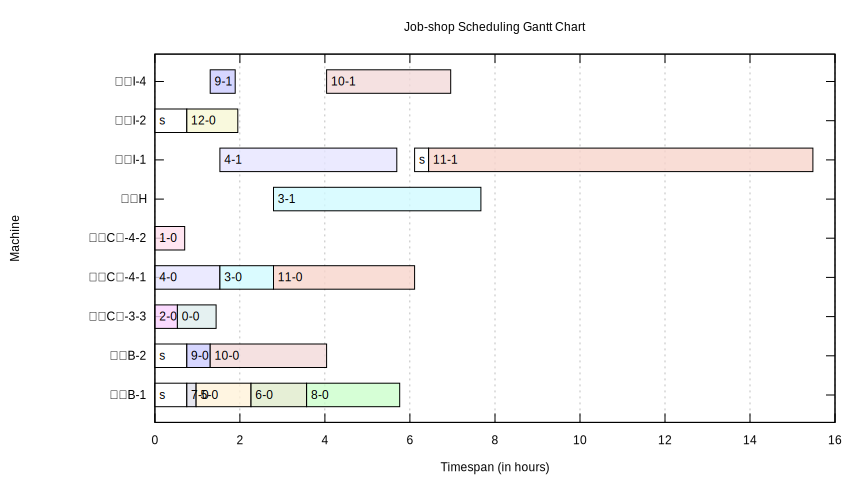

In [2]:
/**
 * Demonstrate the NJ Steel job-shop scheduling system.
 *
 * @author Haksun Li
 */

%use nanjingironsteel, krangl

// download the job data
val jobs = Job.parseJson(BufferedReader(InputStreamReader(URL("https://s2-nmdev.s3.eu-west-3.amazonaws.com/resources/jobs.json").openStream())))
// print the jobs
for (job in jobs) {
    println(job)
}

// download the machine data
val machines = Machine.parseJson(BufferedReader(InputStreamReader(URL("https://s2-nmdev.s3.eu-west-3.amazonaws.com/resources/machines.json").openStream())))
// print the machines
for (machine in machines) {
    println(machine)
}

// do the scheduling
Files.createDirectories(Paths.get("./img"))
val scheduleResultJson = NJSteelJsp.schedule(jobs, machines) // run the scheduling algorithm
val scheduleResult = DataFrame.fromJsonString(scheduleResultJson) // get the results
scheduleResult.print(maxRows=100)

// display the Gantt chart of schedules
val filePath = "./img/gantt.svg"
val svg = String(Files.readAllBytes(Paths.get(filePath)))
MimeTypedResult(mapOf("image/svg+xml" to svg))